# cleanup rtsys source data

In [1]:
import glob

# cognac data and tools
import cognac.insitu as iu

---
## load data

In [2]:
# select campaign

#campaign = 'microco_leg2.yaml'
#campaign = 'lopstech19_leg1.yaml'
#campaign = 'lopstech19_leg2.yaml'
campaign = 'cognac20.yaml'

cp = iu.campaign(campaign)

### load raw data

In [3]:
# load source data
unit = 'emetteur'
sdata = iu.source.load_source_files(cp[unit]['path'], label=unit)

Reads /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/source/data/201123/mission_2020-11-23_10-51-23.txt
Reads /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/source/data/201123/mission_2020-11-23_10-55-56.txt
Reads /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/source/data/201123/mission_2020-11-23_11-29-39.txt
Reads /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/source/data/201123/mission_2020-11-23_11-34-43.txt
Reads /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/source/data/201123/mission_2020-11-23_12-08-39.txt
Reads /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/source/data/201123/mission_2020-11-23_12-45-44.txt
Reads /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/source/data/201123/mission_2020-11-23_12-47-21.txt
Reads /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/source/data/201123/mission_2020-11-23_12-56-25.txt
Reads /U

In [4]:
# inspect gps data
sdata.gps.d.head()

,lon,lat,velocity
time,,,
2020-11-23 10:51:32,7.268177,43.330579,NaN
2020-11-23 10:51:33,7.268170,43.330578,0.561821
2020-11-23 10:51:34,7.268171,43.330581,0.424697
2020-11-23 10:51:35,7.268168,43.330579,0.355327
2020-11-23 10:51:36,7.268164,43.330576,0.520145


In [5]:
#sdata.gps.d.fillna(0., inplace=True)

In [6]:
sdata.gps.plot_bk(unit=cp['source'], rule='1T')

Loading BokehJS ...

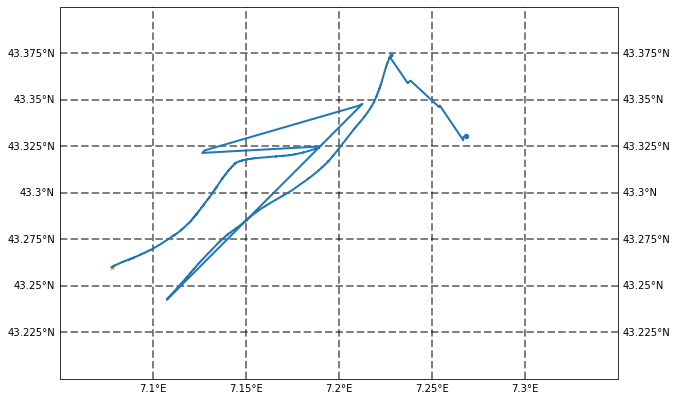

In [7]:
fac = iu.utils.plot_map(cp=cp)
sdata.gps.plot(fac=fac)

---
## clean up data and divide by deployments

In [8]:
# clean gps data with deployment log
source={}
for s in cp['emetteur']:
    print(s)
    source[s.label] = sdata.clean_deployment(s, inplace=False)

--
Deployment label: j1_synchro0
Start:
-
Event label: start
Time: 
2020-11-23 10:56:00
Lon:7.266666666666667 = 7.0deg 15.999999999999996
Lat:43.3295 = 43.0deg 19.77000000000018

End:
-
Event label: end
Time: 
2020-11-23 11:06:30
Lon:7.266666666666667 = 7.0deg 15.999999999999996
Lat:43.32833333333333 = 43.0deg 19.69999999999999


--
Deployment label: j1_synchro1
Start:
-
Event label: start
Time: 
2020-11-23 11:34:50
Lon:7.254166666666666 = 7.0deg 15.249999999999986
Lat:43.347 = 43.0deg 20.82000000000008

End:
-
Event label: end
Time: 
2020-11-23 11:45:20
Lon:7.253833333333334 = 7.0deg 15.230000000000015
Lat:43.346 = 43.0deg 20.759999999999792


--
Deployment label: j1_synchro2
Start:
-
Event label: start
Time: 
2020-11-23 12:08:47
Lon:7.2385 = 7.0deg 14.31000000000001
Lat:43.36033333333334 = 43.0deg 21.620000000000203

End:
-
Event label: end
Time: 
2020-11-23 12:19:12
Lon:7.237 = 7.0deg 14.220000000000006
Lat:43.359 = 43.0deg 21.540000000000106


--
Deployment label: j1
Start:
-
Event

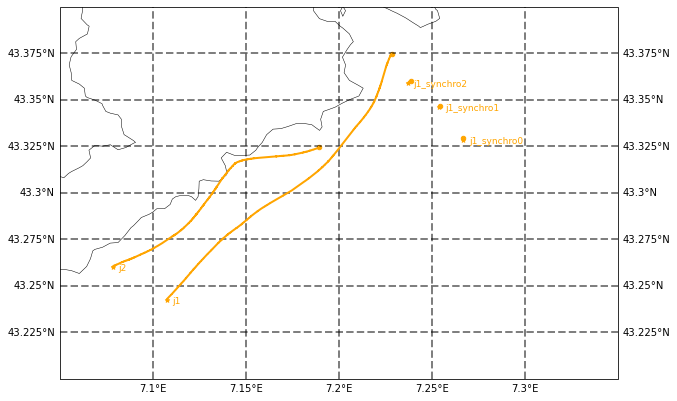

In [9]:
# plot overview map
fac = iu.utils.plot_map(cp=cp, ll_lim=[7.05, 7.35, 43.2, 43.4])
iu.utils.plot_bathy(fac)
for label, s in source.items():
    if s.gps:
        s.gps.plot(fac=fac, label=label, color=cp['emetteur']['color'], offset=.01)

---
## store

In [10]:
for label, lsource in source.items():
    #lsource.to_pickle(cp.pathp+'source_log_'+label+'.p')
    lsource.to_nc(cp.pathp+'emetteur_*_'+label+'.nc')

Data store to /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/datap/emetteur_gps_j1_synchro0.nc
Data store to /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/datap/emetteur_emission_j1_synchro0.nc
Data store to /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/datap/emetteur_gps_j1_synchro1.nc
Data store to /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/datap/emetteur_emission_j1_synchro1.nc
Data store to /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/datap/emetteur_gps_j1_synchro2.nc
Data store to /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/datap/emetteur_emission_j1_synchro2.nc
Data store to /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/datap/emetteur_gps_j1.nc
Data store to /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/data/datap/emetteur_emission_j1.nc
Data store to /Users/aponte/Current_projects/cognac/campagnes/2020_cognac20/da

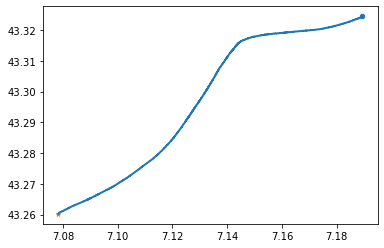

In [11]:
# reload
_source = {}
for label, lsource in source.items():
    _source[label] = iu.source.source_rtsys(file=cp.pathp+'emetteur_*_'+label+'.nc')
_source[label].gps.plot()

---
### load all files

In [5]:
data = cp.load('emission')

In [17]:
data["emetteur"]['j1'].emission.d.head()

,lon,lat,sound
time,,,
2020-11-23 12:56:37,7.228472,43.374420,0.0
2020-11-23 12:57:07,7.228395,43.374447,1.0
2020-11-23 12:57:37,7.228293,43.374462,2.0
2020-11-23 12:58:07,7.228189,43.374479,3.0
2020-11-23 12:58:37,7.228137,43.374473,4.0


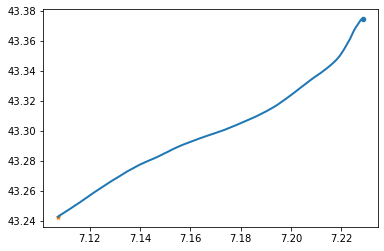

In [21]:
data["emetteur"]['j1'].gps.plot()

In [20]:
data["emetteur"]['j1'].gps.plot_bk()

Loading BokehJS ...

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>], dtype=object)

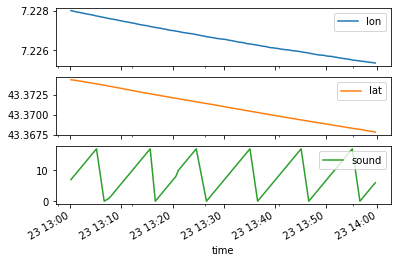

In [16]:
data["emetteur"]['j1'].emission.d["2020-11-23 13:00:00":"2020-11-23 14:00:00"].plot(subplots=True)